# Instructor Lab: Inferential Statistics in Python
BGEN632

**Author:** Brandon Kittle 
**Date:** 04/26/2025
**Assignment:** Independent Lab - Week 9

First thing we will intialize the enviroment and import the libraries we will use 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import shapiro
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import os

os.chdir("C:/Users/brand/Documents/GitHub/week9labs/data")
os.getcwd()

'C:\\Users\\brand\\Documents\\GitHub\\week9labs\\data'

Now let us load in the data we have contained within the data folder that is in interest to the assignment. 

In [3]:
# hospital data
hospital_df = pd.read_csv('CaliforniaHospitalData.csv')
hospital_df.info()

# personnel data
personnel_df = pd.read_table('CaliforniaHospitalData_Personnel.txt')
personnel_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HospitalID   61 non-null     int64  
 1   Name         61 non-null     object 
 2   Zip          61 non-null     object 
 3   Website      61 non-null     object 
 4   TypeControl  61 non-null     object 
 5   Teaching     61 non-null     object 
 6   DonorType    61 non-null     object 
 7   NoFTE        61 non-null     float64
 8   NetPatRev    61 non-null     float64
 9   InOperExp    61 non-null     float64
 10  OutOperExp   61 non-null     float64
 11  OperRev      61 non-null     int64  
 12  OperInc      61 non-null     int64  
 13  AvlBeds      61 non-null     int64  
dtypes: float64(4), int64(4), object(6)
memory usage: 6.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------      

Now lets preform a merge, clean the data or verify its clean as good practice. Then we will form our data base when the following code is run. 


In [4]:
# Merge on 'HospitalID'
merged_df = pd.merge(hospital_df, personnel_df, on='HospitalID')
merged_df.info()
# Drop the unnecessary columns
merged_df = merged_df.drop(columns=['Work_ID', 'PositionID', 'Website'])
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HospitalID     61 non-null     int64  
 1   Name           61 non-null     object 
 2   Zip            61 non-null     object 
 3   Website        61 non-null     object 
 4   TypeControl    61 non-null     object 
 5   Teaching       61 non-null     object 
 6   DonorType      61 non-null     object 
 7   NoFTE          61 non-null     float64
 8   NetPatRev      61 non-null     float64
 9   InOperExp      61 non-null     float64
 10  OutOperExp     61 non-null     float64
 11  OperRev        61 non-null     int64  
 12  OperInc        61 non-null     int64  
 13  AvlBeds        61 non-null     int64  
 14  Work_ID        61 non-null     int64  
 15  LastName       61 non-null     object 
 16  FirstName      61 non-null     object 
 17  Gender         61 non-null     object 
 18  PositionID  

Let us go ahead and add a new record to the database. 



In [5]:
# Create new record to append
new_record = {
    'HospitalID': merged_df['HospitalID'].iloc[0], # pick any existing hospital
    'Name': merged_df['Name'].iloc[0],
    'Zip': merged_df['Zip'].iloc[0],
    'TypeControl': merged_df['TypeControl'].iloc[0],
    'Teaching': merged_df['Teaching'].iloc[0],
    'DonorType': merged_df['DonorType'].iloc[0],
    'NoFTE': 100, 
    'NetPatRev': 1000000,  
    'InOperExp': 500000,  
    'OutOperExp': 400000,  
    'OperRev': 2000000,  
    'OperInc': 1100000,  
    'AvlBeds': 250, 
    'LastName': 'Kittle',
    'FirstName': 'Brandon',
    'Gender': 'Male', 
    'PositionTitle': 'Janitor', 
    'Compensation': 89473,
    'MaxTerm': 3,
    'StartDate': pd.to_datetime('today').normalize()
}

# Append to DF
merged_df = pd.concat([merged_df, pd.DataFrame([new_record])], ignore_index=True)
merged_df.tail()


,HospitalID,Name,Zip,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,OutOperExp,...,AvlBeds,LastName,FirstName,Gender,PositionTitle,Compensation,MaxTerm,StartDate,Phone,Email
57,31032,Long Beach Memorial & Miller Children's Hospital,90806,Non Profit,Teaching,Alumni,5218.0,1187021.872,2.912481e+08,109328611.1,...,462,Dong,HongWei,F,Safety Inspection Member,23987,2,1/1/2012,479-354-4864,hongwei.dong@brokenhealth.com
58,22460,Stanford Hospital & Clinics,94305,Non Profit,Teaching,Alumni,6392.0,4333934.423,9.289621e+08,662155885.7,...,445,Smith,Mary,F,Safety Inspection Member,23987,2,1/1/2012,469-767-5485,mary.smith@ihc.com
59,33192,California Pacific Medical Center - Pacific Ca...,94115,Non Profit,Teaching,Alumni,1565.1,2736281.415,6.337903e+08,296020659.9,...,730,Fourier,Craig,M,Regional Representative,46978,4,1/1/2011,503-235-4877,craig.fourier@comenitymed.com
60,38900,Cedars-Sinai Medical Center,90048,Non Profit,Teaching,Alumni,8000.0,4662581.617,1.285631e+09,461675838.2,...,909,Paanua,Kaaluai,M,Regional Representative,46978,4,1/1/2011,479-684-1883,kaaluai.paanua@brokenhealth.com
61,45740,Mammoth Hospital,93546-0660,District,Small/Rural,Charity,100.0,1000000.000,5.000000e+05,400000.0,...,250,Kittle,Brandon,Male,Janitor,89473,3,2025-04-27 00:00:00,NaN,NaN


Following that we need to ensure formating of datatime and then adjust object columns to being categorical. 

In [ ]:
# Convert to datetime
merged_df['StartDate'] = pd.to_datetime(merged_df['StartDate'], errors='coerce')

# Convert object columns
categorical_columns = ['TypeControl', 'Teaching', 'DonorType', 'Gender']
for col in categorical_columns:
    merged_df[col] = merged_df[col].astype('category')

merged_df.dtypes

HospitalID                int64
Name                     object
Zip                      object
TypeControl            category
Teaching               category
DonorType              category
NoFTE                   float64
NetPatRev               float64
InOperExp               float64
OutOperExp              float64
OperRev                   int64
OperInc                   int64
AvlBeds                   int64
LastName                 object
FirstName                object
Gender                 category
PositionTitle            object
Compensation              int64
MaxTerm                   int64
StartDate        datetime64[ns]
Phone                    object
Email                    object
dtype: object

Now for the fun stuff. We will first create a number summary of the data. 

In [7]:
# Mean, Median, Min, Max
numeric_cols = merged_df.select_dtypes(include=[np.number]).columns

desc_stats = pd.DataFrame({
    'Mean': merged_df[numeric_cols].mean(),
    'Median': merged_df[numeric_cols].median(),
    'Min': merged_df[numeric_cols].min(),
    'Max': merged_df[numeric_cols].max()
})

desc_stats


,Mean,Median,Min,Max
HospitalID,3.205284e+04,3.326700e+04,1.076700e+04,4.699600e+04
NoFTE,1.330099e+03,3.686600e+02,5.500000e+01,8.000000e+03
NetPatRev,6.749129e+05,1.728132e+05,1.417224e+04,4.662582e+06
InOperExp,1.635969e+08,3.124469e+07,5.000000e+05,1.285631e+09
OutOperExp,8.871037e+07,3.259692e+07,4.000000e+05,6.621559e+08
OperRev,2.521721e+08,6.153388e+07,2.000000e+06,1.912179e+09
OperInc,-1.351015e+05,1.464124e+06,-3.211633e+08,1.648724e+08
AvlBeds,1.954194e+02,1.005000e+02,1.200000e+01,9.090000e+02
Compensation,9.272147e+04,4.697800e+04,2.398700e+04,2.489040e+05
MaxTerm,4.225806e+00,4.000000e+00,2.000000e+00,8.000000e+00


Likewise, a text object summary. Not sure what the proper name for this is but it will be a summary of the text data. 

In [8]:
text_cols = merged_df.select_dtypes(include=['object']).columns
merged_df[text_cols].describe()


,Name,Zip,LastName,FirstName,PositionTitle,Phone,Email
count,62,62,62,62,62,61,61
unique,61,61,24,20,5,24,24
top,Mammoth Hospital,93546-0660,Smith,David,Regional Representative,785-532-2452,david.web@comenitymed.com
freq,2,2,4,6,24,3,3


Now for the catagorical data. I wonder if there has ever been an effective program to summarize and pull relational coding from categorical data. Wouldn't that be nice for a GTM data scientist? Sorry, been learning about the GTM data science and starting my first project within the methodology. 

In [9]:
cat_cols = merged_df.select_dtypes(include=['category']).columns
merged_df[cat_cols].describe()


,TypeControl,Teaching,DonorType,Gender
count,62,62,62,62
unique,4,2,2,3
top,Non Profit,Small/Rural,Charity,F
freq,37,45,45,32


Now we can move on to the visualizations. We will start with a histogram of the data. 

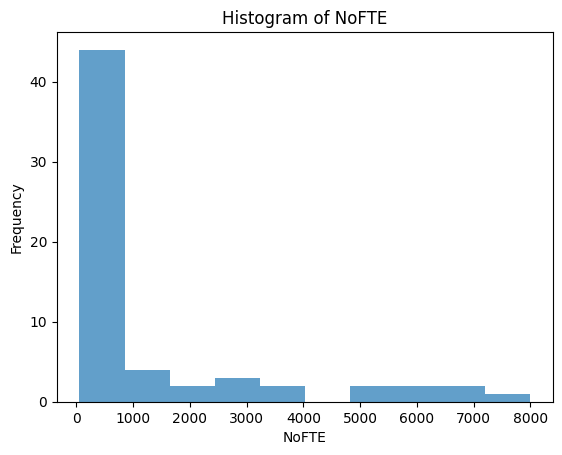

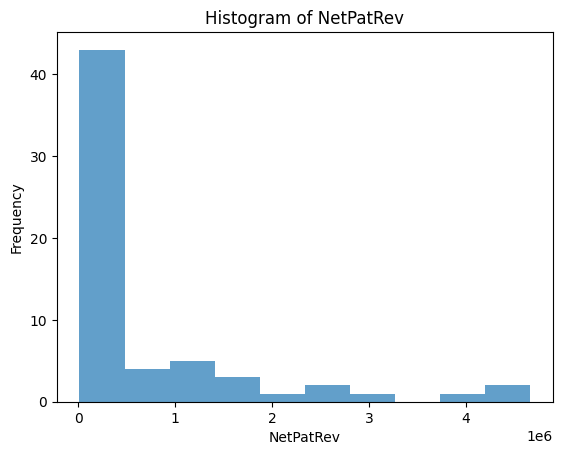

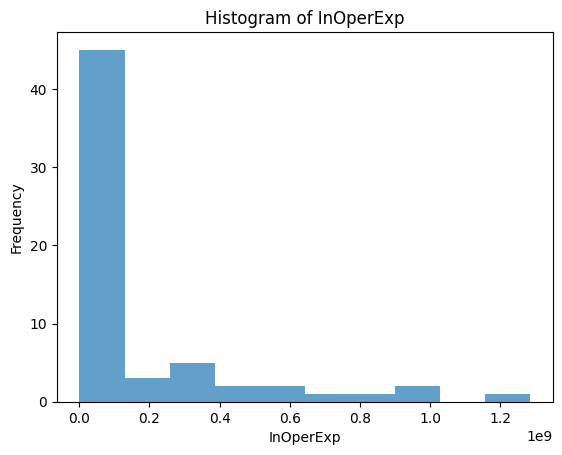

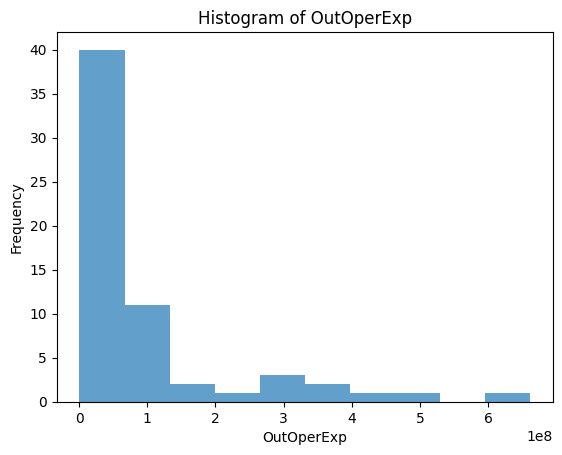

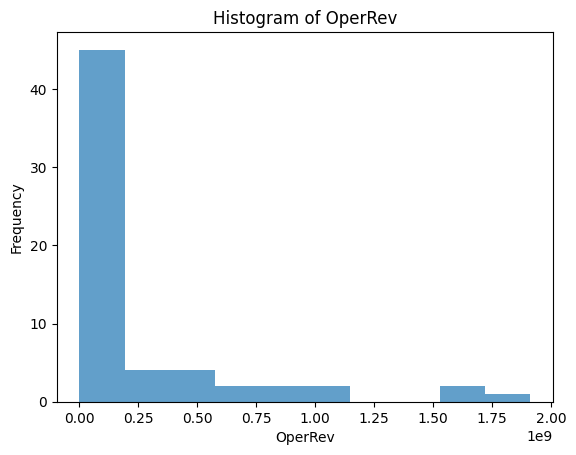

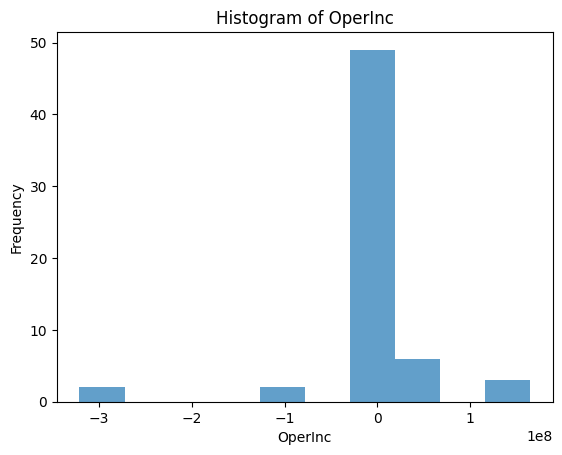

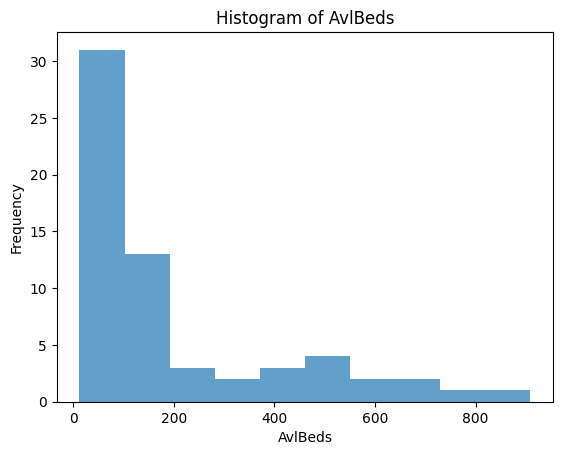

In [10]:
hist_vars = ['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds']

for var in hist_vars:
    merged_df[var].plot.hist(alpha=0.7)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()


Scatter plots of the data required. 

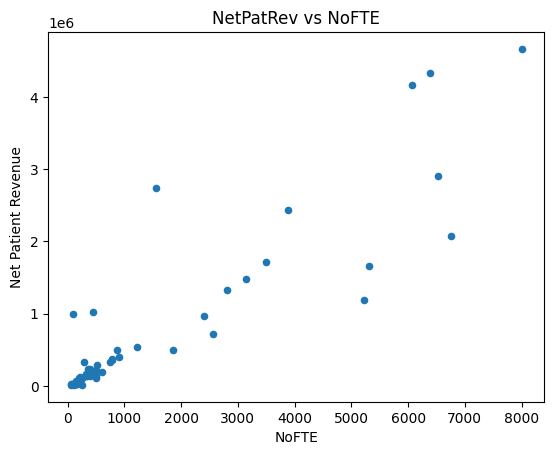

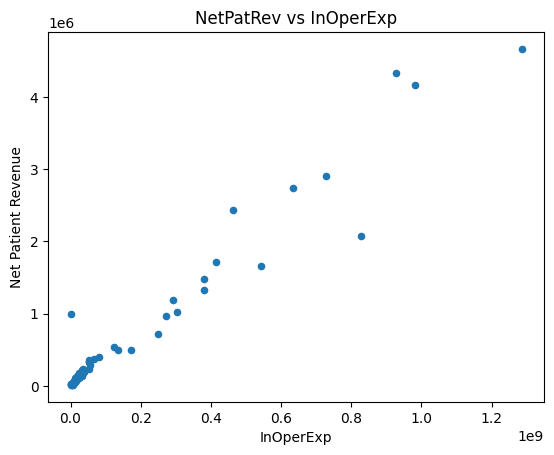

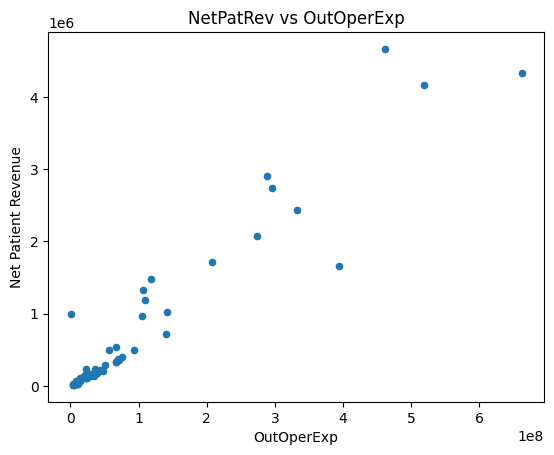

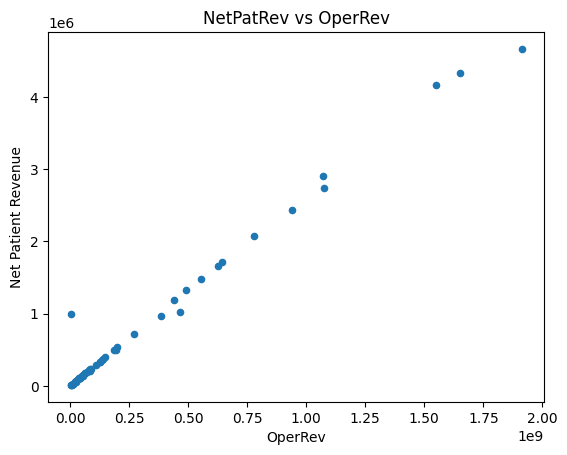

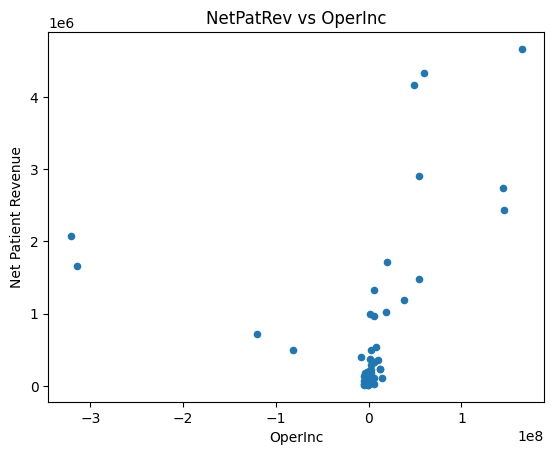

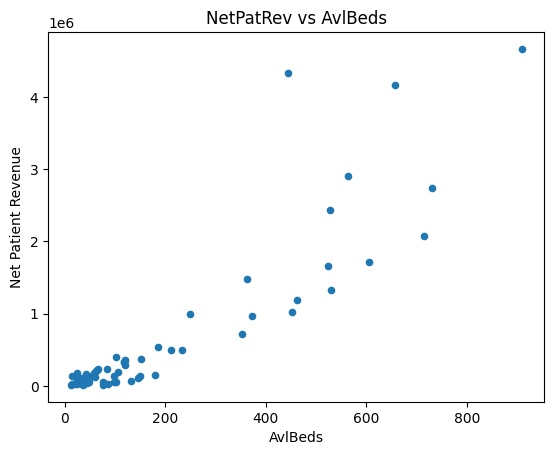

In [11]:
scatter_vars = ['NoFTE', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds']

for var in scatter_vars:
    merged_df.plot.scatter(x=var, y='NetPatRev')
    plt.title(f'NetPatRev vs {var}')
    plt.xlabel(var)
    plt.ylabel('Net Patient Revenue')
    plt.show()


Box plots. I hate formatting these things. 

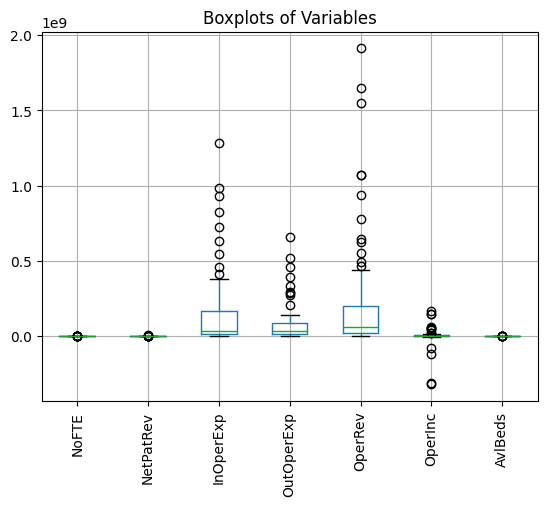

In [12]:
merged_df[hist_vars].boxplot(rot=90)
plt.title('Boxplots of Variables')
plt.show()

Yep. Mine always look ugly.


QQ plots. 

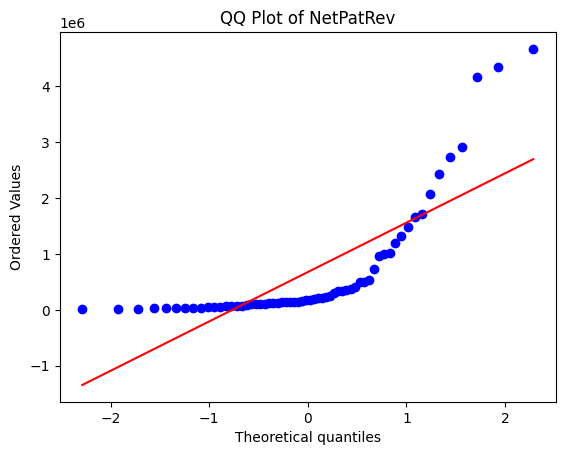

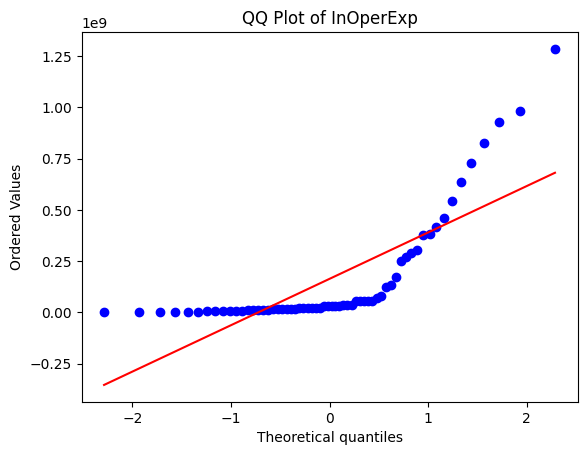

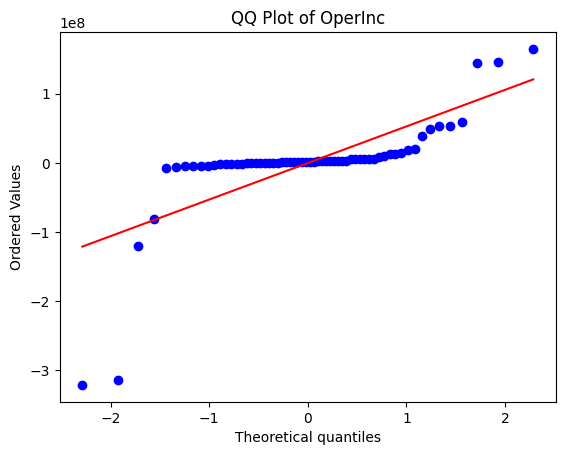

In [13]:
qq_vars = ['NetPatRev', 'InOperExp', 'OperInc']  

for var in qq_vars:
    sts.probplot(merged_df[var], dist="norm", plot=plt)
    plt.title(f'QQ Plot of {var}')
    plt.show()

Dang, none of those are looking good for the Straight line test. 

Oh well, moving on. 

Lastly, Sharpio-Wilk test.

In [14]:
for var in qq_vars:
    stat, p = shapiro(merged_df[var].dropna())
    print(f'Shapiro-Wilk Test for {var}: W={stat:.4f}, p-value={p:.4f}')

Shapiro-Wilk Test for NetPatRev: W=0.6311, p-value=0.0000
Shapiro-Wilk Test for InOperExp: W=0.6254, p-value=0.0000
Shapiro-Wilk Test for OperInc: W=0.5554, p-value=0.0000
